#https://ai.google.dev/gemini-api/docs/get-started/tutorial?lang=python

**Step1: Environment Setup**


In [35]:
!pip install -q -U google-generativeai

In [27]:
import pathlib
import textwrap
import google.generativeai as gemini

from IPython.display import display
from IPython.display import Markdown

#securely store your API key
from google.colab import userdata

#fetch the key in notebook
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
#configure
gemini.configure(api_key=GOOGLE_API_KEY)

**Step2: Define function to generate text in MD format**

In [28]:
#function to  convert text to MD
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

**Example1: Generate Text from an Input Text: My First Prompt** 🙂

In [29]:
#list models available
#for m in gemini.list_models():
  #print(m)
  #if 'generateContent' in m.supported_generation_methods:
   # print(m.name)

model = gemini.GenerativeModel('gemini-1.5-flash')

#pass a prompt to get a response
response = model.generate_content("My name is Madhur and this is my first use of gemini api")

#retrieve
response.text
#retrieve in MD format
to_markdown(response.text)

#View the possible responses, called candidates:
#response.candidates

#generate response in streams/ chunks:
#response = model.generate_content("My name is Madhur and this is my first use of gemini api", stream = True)
#for chunk in response:
 # print(chunk.text)
  #print("."*80) #prints a line of 80 "." after printing each chunk, creating a visual separation between chunks.


> Welcome to the world of Gemini API, Madhur! It's great to have you onboard. 
> 
> What are you hoping to achieve with your first use? Do you have a specific project in mind or just exploring the capabilities? I'm here to help you get started. Let me know what you'd like to do, and I can guide you through the process. 


**Example 2: Generate text from image and text inputs**

**2a: Get the image**

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  108k  100  108k    0     0   799k      0 --:--:-- --:--:-- --:--:--  802k


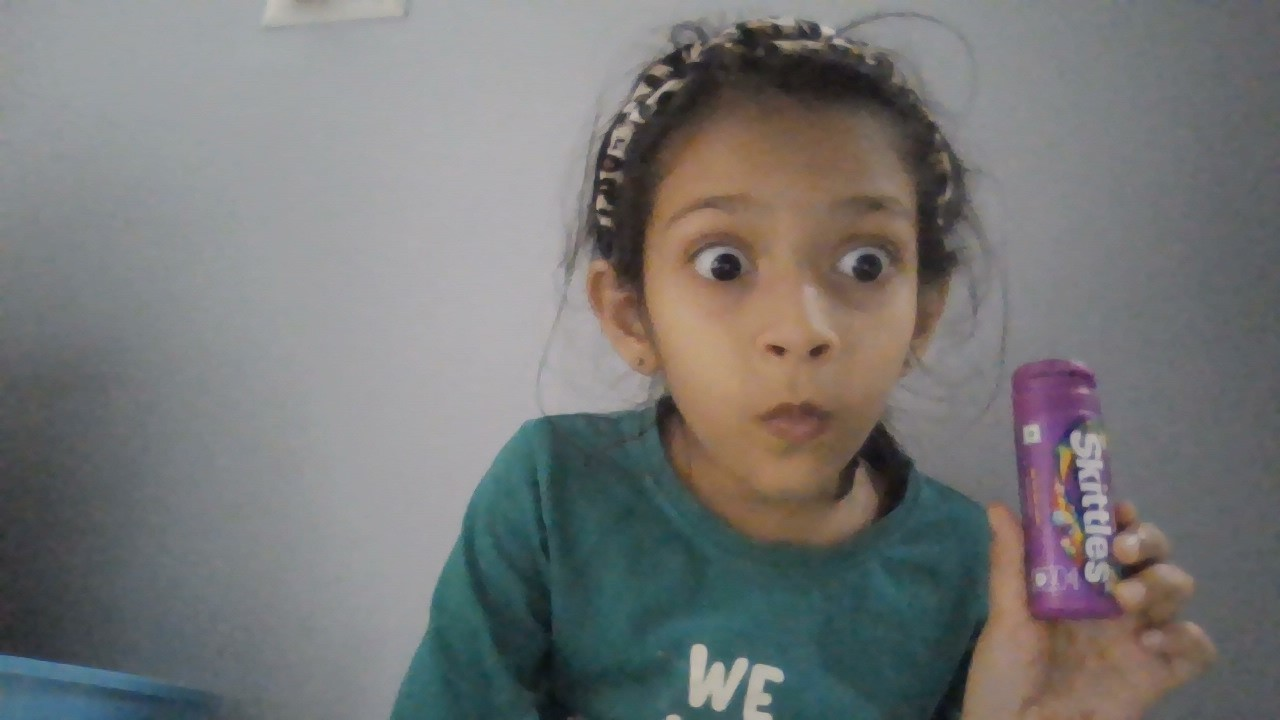

In [42]:
#get the image
!curl -o image.jpg https://raw.githubusercontent.com/agarwaalmadhurr/GenAIKinderGarten/main/deetu.jpg

#this image gets downloaded in current working directory (of colab) /content/
#import os
#print("Current working directory:", os.getcwd())

# List files in the current directory to confirm the image is downloaded
#!ls -lh /content/
#!head image.jpg

# Load and display the image
from PIL import Image
from IPython.display import display

img = Image.open('image.jpg')
#display(img)

**2b: Use GenAI model on this image - My Second Prompt** 😃

In [43]:
model = gemini.GenerativeModel('gemini-1.5-flash')
response = model.generate_content(img)
to_markdown(response.text)

> This image shows a young girl with a surprised expression, holding a tube of Skittles candy. She is wearing a green shirt and a leopard-print headband. The background is a light gray wall.

**2c: Provide a text in addition to image - My extended Second Prompt** 😃

In [44]:
model = gemini.GenerativeModel('gemini-1.5-flash')
response = model.generate_content(["Write a short, engaging blog post based on this picture. Give it a nice title. Girl's name is Deetya", img], stream=True)
response.resolve()
to_markdown(response.text)

> ## Deetya's Skittles Surprise! 
> 
> Deetya is having a Skittles surprise!  Look at her eyes, they're wide with excitement.  She's holding her Skittles in her hand, and you can just tell she can't wait to open it up and taste those delicious fruity flavors!  What kind of Skittles do you think Deetya has?  Are they wild berry, or maybe tropical?  Let us know in the comments! 😄 


**Example 3: Chat Conversations** 😃 😀

In [45]:
model = gemini.GenerativeModel('gemini-1.5-flash')

#initialize the chat
chat = model.start_chat(history=[])
#chat

#instead of generate_content use ChatSession class
#ChatSession.send_message method returns the same GenerateContentResponse type as GenerativeModel.generate_content.
#It also appends your message and the response to the chat history

response = chat.send_message("My name is Madhur and this is my first use of gemini api")
to_markdown(response.text)

#chat.history

#get a user friendly response:
for message in chat.history:
  display(to_markdown(f"**{message.role}**: {message.parts[0].text}"))

> **user**: My name is Madhur and this is my first use of gemini api

> **model**: Welcome to the world of Gemini API, Madhur! I'm excited for you to explore its capabilities.  
> 
> What are you hoping to achieve with the Gemini API? Knowing your goals can help me provide more specific advice and guidance. 
> 
> For example, tell me:
> 
> * **What kind of project are you working on?** (e.g., chatbot, content creation, research, etc.)
> * **What specific features of Gemini API are you interested in?** (e.g., text generation, translation, summarization, etc.)
> * **Are you encountering any challenges or have specific questions about using the API?**
> 
> I'm here to help you get the most out of your experience.  Let's make this a great start! 😊 


In [48]:
#continue chat
response = chat.send_message("Thanks. I'm just getting started and doing my first tutorial")
for message in chat.history:
  display(to_markdown(f"**{message.role}**: {message.parts[0].text}"))

> **user**: My name is Madhur and this is my first use of gemini api

> **model**: Welcome to the world of Gemini API, Madhur! I'm excited for you to explore its capabilities.  
> 
> What are you hoping to achieve with the Gemini API? Knowing your goals can help me provide more specific advice and guidance. 
> 
> For example, tell me:
> 
> * **What kind of project are you working on?** (e.g., chatbot, content creation, research, etc.)
> * **What specific features of Gemini API are you interested in?** (e.g., text generation, translation, summarization, etc.)
> * **Are you encountering any challenges or have specific questions about using the API?**
> 
> I'm here to help you get the most out of your experience.  Let's make this a great start! 😊 


> **user**: Thanks. I'm just getting started and doing my first tutorial

> **model**: That's awesome! It's always a good idea to start with tutorials.  They're a fantastic way to get your feet wet and learn the basics of any new tool. 
> 
> Can you tell me which tutorial you're following? I might be able to offer some tips or insights based on that specific tutorial. 
> 
> If you'd like, I can also point you to some additional resources that might be helpful for your Gemini API journey:
> 
> * **Official Gemini API Documentation:**  This is your go-to source for the most up-to-date information and examples. 
> * **Community Forums:** Many online communities are dedicated to Gemini API, where you can connect with other users, ask questions, and share your experiences. 
> * **Open-Source Projects:** Explore repositories on platforms like GitHub, where developers share their code and projects using Gemini API, which can offer valuable learning opportunities.
> 
> Remember, the best way to learn is by experimenting and playing around.  Don't be afraid to try different things and see what you can create! 
> 
> Let me know if you have any questions, and I'll be happy to help in any way I can.  Good luck with your tutorial! 


> **user**: Thanks. I'm just getting started and doing my first tutorial

> **model**: That's awesome! It's always a good idea to start with tutorials.  They're a fantastic way to get your feet wet and learn the basics of any new tool. 
> 
> Can you tell me which tutorial you're following? I might be able to offer some tips or insights based on that specific tutorial. 
> 
> If you'd like, I can also point you to some additional resources that might be helpful for your Gemini API journey:
> 
> * **Official Gemini API Documentation:**  This is your go-to source for the most up-to-date information and examples. 
> * **Community Forums:** Many online communities are dedicated to Gemini API, where you can connect with other users, ask questions, and share your experiences. 
> * **Open-Source Projects:** Explore repositories on platforms like GitHub, where developers share their code and projects using Gemini API, which can offer valuable learning opportunities.
> 
> Remember, the best way to learn is by experimenting and playing around.  Don't be afraid to try different things and see what you can create! 
> 
> Let me know if you have any questions, and I'll be happy to help in any way I can.  Good luck with your tutorial! 


> **user**: Thanks. I'm just getting started and doing my first tutorial

> **model**: That's awesome! It's always a good idea to start with tutorials.  They're a fantastic way to get your feet wet and learn the basics of any new tool. 
> 
> Can you tell me which tutorial you're following? I might be able to offer some tips or insights based on that specific tutorial. 
> 
> If you'd like, I can also point you to some additional resources that might be helpful for your Gemini API journey:
> 
> * **Official Gemini API Documentation:**  This is your go-to source for the most up-to-date information and examples. 
> * **Community Forums:** Many online communities are dedicated to Gemini API, where you can connect with other users, ask questions, and share your experiences. 
> * **Open-Source Projects:** Explore repositories on platforms like GitHub, where developers share their code and projects using Gemini API, which can offer valuable learning opportunities.
> 
> Remember, the best way to learn is by experimenting and playing around.  Don't be afraid to try different things and see what you can create! 
> 
> Let me know if you have any questions, and I'll be happy to help in any way I can.  Good luck with your tutorial! 


**Appendix: Tokenaization & Embeddings:**

In [53]:
#Count tokens
count_tokens = model.count_tokens(chat.history)
print(f"Tokens: {count_tokens}")

#embeddings:
#Use the embed_content method to generate embeddings
result = gemini.embed_content(
    model="models/embedding-001",
    content="My name is Madhur",
    task_type="retrieval_document",
    title="Embedding Example using a single string")

#complete embeddings
print(str(result['embedding']))

#first 50 characters
#print(str(result['embedding'])[:50], '... TRIMMED]')

[0.021130893, 0.009183954, -0.015694275, -0.021895 ... TRIMMED]
